# First Attempt: Calculating SAM Using EOFs

This is my first attempt. Simply calculate the EOF and PC1 at the 850 hPa level.

This document contains EOF1, PC1, and PC1 (normalised) for:
- Monthly average EOF
- DJF average EOF
- JAS average EOF

In [2]:
import xarray as xr
import os

import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from eofs.xarray import Eof

import functions.data_wrangling as dw

In [3]:
path = '/home/links/ct715/data_storage/reanalysis/jra55_daily'
data_file = os.path.join(path, 'jra55_uvtw.nc')
ds = xr.open_mfdataset(data_file, chunks={'time': 30})
u = ds['u'].sel(level=850, method='nearest')
u

<xarray.DataArray 'u' (time: 21550, lat: 73, lon: 144)> Size: 906MB
dask.array<getitem, shape=(21550, 73, 144), dtype=float32, chunksize=(30, 73, 144), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 172kB 1958-01-01T09:00:00 ... 2016-12-31T0...
  * lon      (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 584B 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
    level    float64 8B 850.0

## Monthly mean

In [4]:
u_mon = u.resample(time='1ME').mean()

In [5]:
# Remove the time mean so that the EOF analysis is based on anomalies.
u_mon_anom = u_mon - u_mon.mean(dim='time')

# The eofs package expects the data array with dimensions (time, lat, lon)
solver_mon = Eof(u_mon_anom)

# Retrieve the first EOF (note that solver.eofs returns an extra dimension 'mode')
eof1_mon = solver_mon.eofs(neofs=1).isel(mode=0)

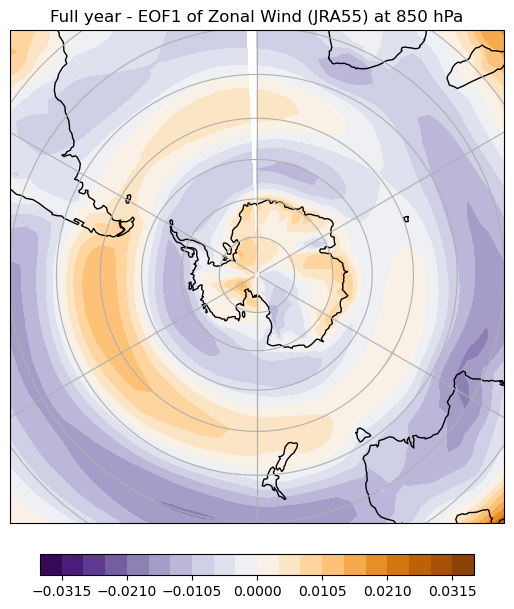

In [7]:
# -------------------------------
# 4. Plot EOF1 on a South Polar Stereographic Projection
# -------------------------------
# Define the polar projection centered on the South Pole.
proj = ccrs.SouthPolarStereo()

fig, ax = plt.subplots(subplot_kw={'projection': proj}, figsize=(8,8))
# Set the map extent: full longitude range and from the South Pole to 30°S
ax.set_extent([-180, 180, -90, -30], crs=ccrs.PlateCarree())

# Plot the first EOF. We use contourf to fill contours.
contour = ax.contourf(u_mon.lon, u_mon.lat, eof1_mon, levels=np.linspace(-0.035, 0.035, 21), transform=ccrs.PlateCarree(), cmap='PuOr_r')

# Add coastlines and gridlines for context.
ax.coastlines()
ax.gridlines()

# Add a title and a horizontal colorbar.
plt.title("Full year - EOF1 of Zonal Wind (JRA55) at 850 hPa")
plt.colorbar(contour, orientation='horizontal', pad=0.05, shrink=0.7)

plt.savefig('../plots/sam_reanalysis/SAM_JRA55_monthly_EOF1.png')
plt.show()

1.2122978e-08
2.241404e-06


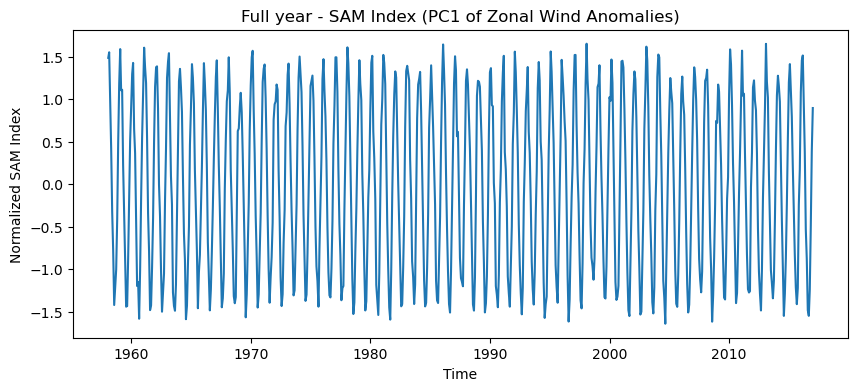

In [ ]:
# Here, the SAM index is defined as the first principal component (PC1)
# time series associated with the first EOF mode.
sam_index_mon = solver_mon.pcs(npcs=1).squeeze()

# Optionally, normalize the SAM index for easier comparison:
sam_index_norm_mon = (sam_index_mon - sam_index_mon.mean(dim='time')) / sam_index_mon.std(dim='time')

print(sam_index_norm_mon.mean('time').values)
print(sam_index_mon.mean('time').values)


# -------------------------------
# 5. Plot the SAM Index Time Series
# -------------------------------
plt.figure(figsize=(10, 4))
sam_index_norm_mon.plot()
plt.title("Full year - SAM Index (PC1 of Zonal Wind Anomalies)")
plt.ylabel("Normalized SAM Index")
plt.xlabel("Time")

plt.savefig('./plots/sam_reanalysis/SAM_JRA55_monthly_norm-PC1.png')
plt.show()

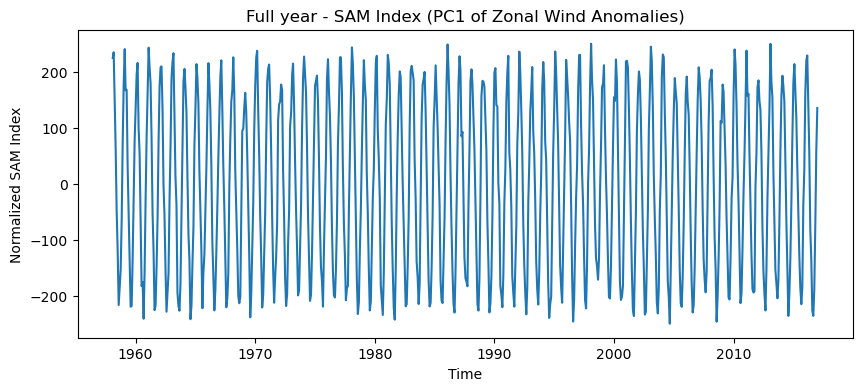

In [ ]:
# Non-normalized SAM index
plt.figure(figsize=(10, 4))
sam_index_mon.plot()
plt.title("Full year - SAM Index (PC1 of Zonal Wind Anomalies)")
plt.ylabel("Normalized SAM Index")
plt.xlabel("Time")

plt.savefig('./plots/sam_reanalysis/SAM_JRA55_monthly_PC1.png')
plt.show()

#### SAM Variance

In [ ]:
sam_index_norm_mon_var = sam_index_norm_mon.var(dim='time')
sam_index_norm_mon_var 

<xarray.DataArray 'pcs' ()> Size: 4B
array(0.9999998, dtype=float32)
Coordinates:
    mode     int64 8B 0

In [ ]:
sam_index_mon_var = sam_index_mon.var(dim='time')
sam_index_mon_var 

<xarray.DataArray 'pcs' ()> Size: 4B
array(22888.688, dtype=float32)
Coordinates:
    mode     int64 8B 0

## DJF mean

In [ ]:
u_djf = dw.seasonal_mean(u, season='djf')

In [ ]:
# Remove the time mean so that the EOF analysis is based on anomalies.
u_anom_djf = u_djf - u_djf.mean(dim='time')

# The eofs package expects the data array with dimensions (time, lat, lon)
solver_djf = Eof(u_anom_djf)

# Retrieve the first EOF (note that solver.eofs returns an extra dimension 'mode')
eof1_djf = solver_djf.eofs(neofs=1).isel(mode=0)

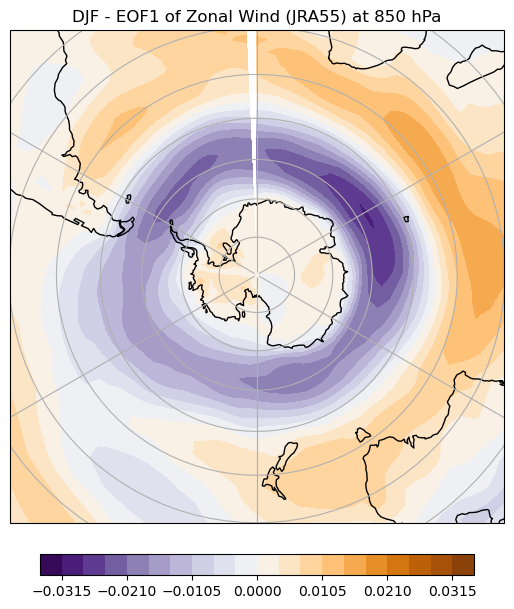

In [ ]:
# -------------------------------
# 4. Plot EOF1 on a South Polar Stereographic Projection
# -------------------------------
# Define the polar projection centered on the South Pole.
proj = ccrs.SouthPolarStereo()

fig, ax = plt.subplots(subplot_kw={'projection': proj}, figsize=(8,8))
# Set the map extent: full longitude range and from the South Pole to 30°S
ax.set_extent([-180, 180, -90, -30], crs=ccrs.PlateCarree())

# Plot the first EOF. We use contourf to fill contours.
contour = ax.contourf(u_djf.lon, u_djf.lat, eof1_djf, levels=np.linspace(-0.035, 0.035, 21), transform=ccrs.PlateCarree(), cmap='PuOr_r')

# Add coastlines and gridlines for context.
ax.coastlines()
ax.gridlines()

# Add a title and a horizontal colorbar.
plt.title("DJF - EOF1 of Zonal Wind (JRA55) at 850 hPa")
plt.colorbar(contour, orientation='horizontal', pad=0.05, shrink=0.7)

plt.savefig('./plots/sam_reanalysis/SAM_JRA55_DJF_EOF1.png')
plt.show()

2.970531e-08
2.3817023e-07


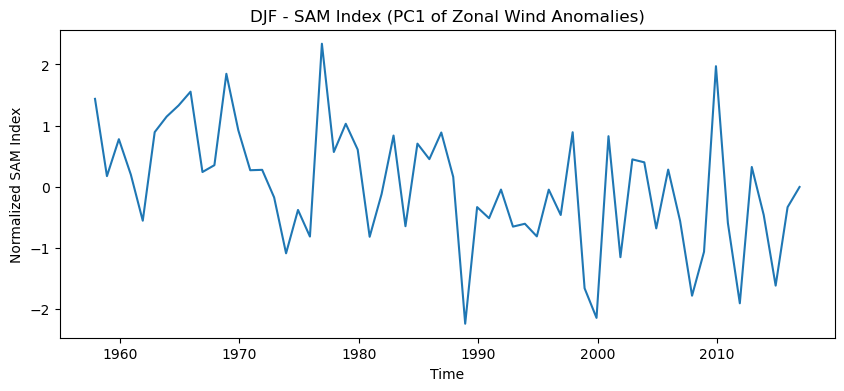

In [ ]:
# Here, the SAM index is defined as the first principal component (PC1)
# time series associated with the first EOF mode.
sam_index_djf = solver_djf.pcs(npcs=1).squeeze()

# Optionally, normalize the SAM index for easier comparison:
sam_index_norm_djf = (sam_index_djf - sam_index_djf.mean(dim='time')) / sam_index_djf.std(dim='time')

print(sam_index_norm_djf.mean('time').values)
print(sam_index_djf.mean('time').values)

# -------------------------------
# 5. Plot the SAM Index Time Series
# -------------------------------
plt.figure(figsize=(10, 4))
sam_index_norm_djf.plot()
plt.title("DJF - SAM Index (PC1 of Zonal Wind Anomalies)")
plt.ylabel("Normalized SAM Index")
plt.xlabel("Time")

plt.savefig('./plots/sam_reanalysis/SAM_JRA55_DJF_norm-PC1.png')
plt.show()

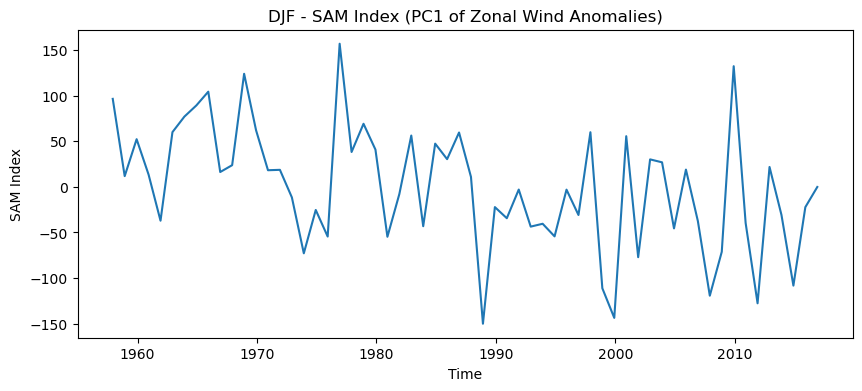

In [ ]:
# Non-normalized SAM index
plt.figure(figsize=(10, 4))
sam_index_djf.plot()
plt.title("DJF - SAM Index (PC1 of Zonal Wind Anomalies)")
plt.ylabel("SAM Index")
plt.xlabel("Time")

plt.savefig('./plots/sam_reanalysis/SAM_JRA55_DJF_PC1.png')
plt.show()

#### SAM Variance

In [ ]:
sam_index_norm_djf_var = sam_index_norm_djf.var(dim='time')
sam_index_norm_djf_var 

<xarray.DataArray 'pcs' ()> Size: 4B
array(1.0000001, dtype=float32)
Coordinates:
    mode     int64 8B 0

In [ ]:
sam_index_djf_var = sam_index_djf.var(dim='time')
sam_index_djf_var 

<xarray.DataArray 'pcs' ()> Size: 4B
array(4502.594, dtype=float32)
Coordinates:
    mode     int64 8B 0

## JAS mean

In [ ]:
u_jas = dw.seasonal_mean(u, season='jas')

In [ ]:
# Remove the time mean so that the EOF analysis is based on anomalies.
u_anom_jas = u_jas - u_jas.mean(dim='time')

# The eofs package expects the data array with dimensions (time, lat, lon)
solver_jas = Eof(u_anom_jas)

# Retrieve the first EOF (note that solver.eofs returns an extra dimension 'mode')
eof1_jas = solver_jas.eofs(neofs=1).isel(mode=0)

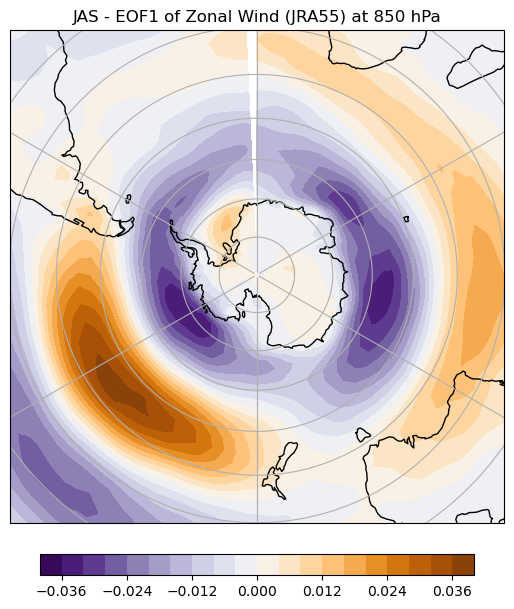

In [ ]:
# -------------------------------
# 4. Plot EOF1 on a South Polar Stereographic Projection
# -------------------------------
# Define the polar projection centered on the South Pole.
proj = ccrs.SouthPolarStereo()

fig, ax = plt.subplots(subplot_kw={'projection': proj}, figsize=(8,8))
# Set the map extent: full longitude range and from the South Pole to 30°S
ax.set_extent([-180, 180, -90, -30], crs=ccrs.PlateCarree())

# Plot the first EOF. We use contourf to fill contours.
contour = ax.contourf(u_jas.lon, u_jas.lat, eof1_jas, levels=np.linspace(-0.04, 0.04, 21), transform=ccrs.PlateCarree(), cmap='PuOr_r')

# Add coastlines and gridlines for context.
ax.coastlines()
ax.gridlines()

# Add a title and a horizontal colorbar.
plt.title("JAS - EOF1 of Zonal Wind (JRA55) at 850 hPa")
plt.colorbar(contour, orientation='horizontal', pad=0.05, shrink=0.7)

plt.savefig('./plots/sam_reanalysis/SAM_JRA55_JAS_EOF1.png')
plt.show()

-5.556365e-09
3.5560737e-07


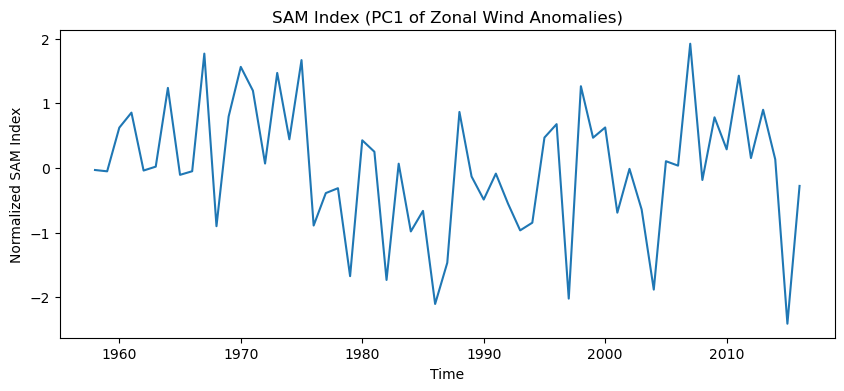

In [ ]:
# Here, the SAM index is defined as the first principal component (PC1)
# time series associated with the first EOF mode.
sam_index_jas = solver_jas.pcs(npcs=1).squeeze()

# Optionally, normalize the SAM index for easier comparison:
sam_index_norm_jas = (sam_index_jas - sam_index_jas.mean(dim='time')) / sam_index_jas.std(dim='time')

print(sam_index_norm_jas.mean('time').values)
print(sam_index_jas.mean('time').values)

# -------------------------------
# 5. Plot the SAM Index Time Series
# -------------------------------
plt.figure(figsize=(10, 4))
sam_index_norm_jas.plot()
plt.title("SAM Index (PC1 of Zonal Wind Anomalies)")
plt.ylabel("Normalized SAM Index")
plt.xlabel("Time")

plt.savefig('./plots/sam_reanalysis/SAM_JRA55_DJF_norm-PC1.png')
plt.show()

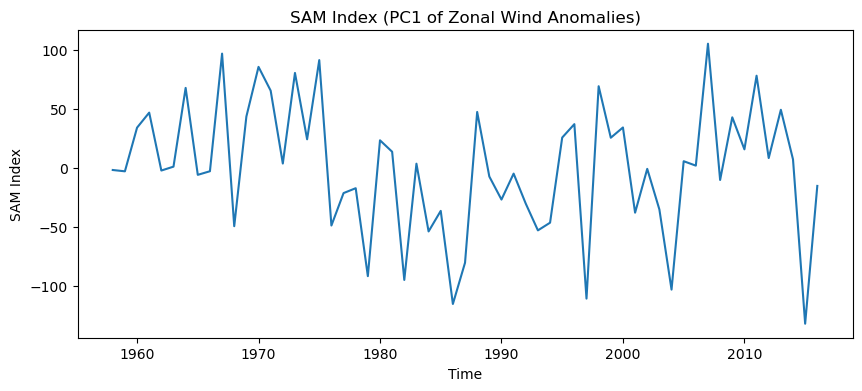

In [ ]:
# Non-normalized SAM index
plt.figure(figsize=(10, 4))
sam_index_jas.plot()
plt.title("SAM Index (PC1 of Zonal Wind Anomalies)")
plt.ylabel("SAM Index")
plt.xlabel("Time")

plt.savefig('./plots/sam_reanalysis/SAM_JRA55_DJF_PC1.png')
plt.show()

#### SAM Variance

In [ ]:
sam_index_norm_jas_var = sam_index_norm_jas.var(dim='time')
sam_index_norm_jas_var 

<xarray.DataArray 'pcs' ()> Size: 4B
array(0.9999998, dtype=float32)
Coordinates:
    mode     int64 8B 0

In [ ]:
sam_index_jas_var = sam_index_jas.var(dim='time')
sam_index_jas_var 

<xarray.DataArray 'pcs' ()> Size: 4B
array(2979.8247, dtype=float32)
Coordinates:
    mode     int64 8B 0